### Template Matching
Learn to search for an object in an image using Template Matching

#### 목표
In this chapter, you will learn

* To find objects in an image using Template Matching
* You will see these functions : cv.matchTemplate(), cv.minMaxLoc()

#### 이론
템플릿 매칭은 큰 이미지에서 템플릿 이미지의 위치를 검색하고 찾는 방법입니다. OpenCV는 이 목적으로 cv.matchTemplate () 함수를 제공 합니다. 단순히 2D 컨볼 루션에서와 같이 입력 이미지 위에 템플릿 이미지를 슬라이드하고 템플릿 이미지 아래에서 입력 이미지의 템플릿과 패치를 비교합니다. 몇 가지 비교 방법이 OpenCV에서 구현됩니다. (자세한 내용은 문서를 확인할 수 있음). 그레이 스케일 이미지를 반환합니다. 각 픽셀은 해당 픽셀의 인접 영역이 템플릿과 얼마나 일치하는지 나타냅니다.

입력 이미지의 크기가 (WxH)이고 템플릿 이미지의 크기가 (wxh)이면 출력 이미지의 크기는 (W-w + 1, H-h + 1)이됩니다. 결과를 얻었 으면 cv.minMaxLoc () 함수를 사용 하여 어디에서 최대 / 최소값을 찾을 수 있습니다. 그것을 사각형의 왼쪽 위 모서리로 가져 와서 사각형의 너비와 높이로 (w, h)를 가져옵니다. 그 직사각형이 여러분의 템플릿 영역입니다.

> 노트
비교 메소드로서 cv.TM_SQDIFF 를 사용하고있는 경우 , 최소치가 최적의 일치를줍니다.

#### OpenCV의 템플릿 매칭
예를 들어, 사진에서 Messi의 얼굴을 검색합니다. 그래서 저는 아래와 같이 템플릿을 만들었습니다 :

![](messi_face.jpg)
영상
우리는 결과가 어떻게 보이는지 알 수 있도록 모든 비교 방법을 시도 할 것입니다


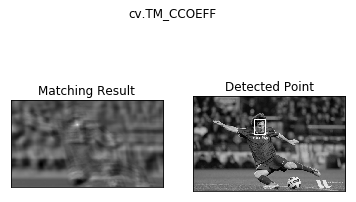

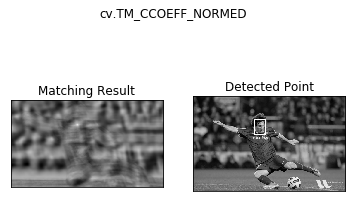

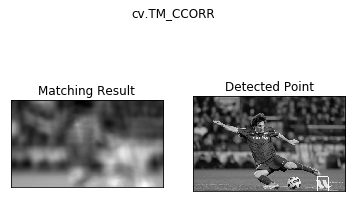

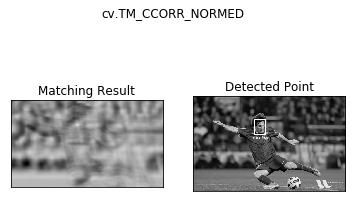

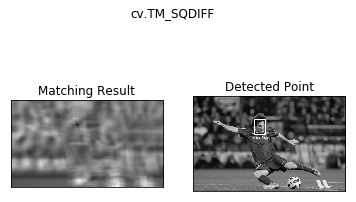

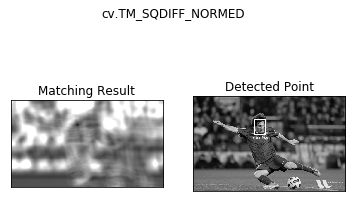

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('messi5.jpg',0)
img2 = img.copy()
template = cv.imread('messi_face.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img, top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

cv.TM_CCORR을 사용한 결과 가 예상대로 좋지 않다는 것을 알 수 있습니다 .

#### 여러 객체와 템플릿 매칭
이전 섹션에서는 이미지에서 한 번만 나타나는 Messi의 얼굴을 검색했습니다. 여러 번 발생하는 객체를 찾고 있다고 가정하면 cv.minMaxLoc () 이 모든 위치를 제공하지는 않습니다. 이 경우 임계 값을 사용합니다. 따라서이 예에서는 유명한 게임 인 Mario 의 스크린 샷을 사용 하고 동전을 찾습니다.

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_rgb  = cv.imread('mario.png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('mario_coin.png', 0)

w, h      = template.shape[::-1]
res       = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc       = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
cv.imwrite('res.png',img_rgb)

True